## Description of Data

**Pregnancies :** information about the number of pregnancy female had till date

**Glucose :** glucose level of patient generally higher glucose level shoes the chances of sugar
**BloodPressure :** Blood pressure data of the patient
**SkinThickness** : Skin thickness of patient
**Insulin**: Insulin level of patient
**BMI :** The full form of BMI is Body Mass Index. It is a method of measuring through which individuals are classified into the following **categories**: obese, overweight, normal weight and underweight.
**DiabetesPedigreeFunction** : Diabetes pedigree function ( DiabetesPedigreeFunction) The Diabetes Pedigree Function, pedi, provides some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence give us an idea of the hereditary risk one might have with the onset of diabetes mellitus
**Age** : Age of patient
**Outcome** : 0 shows that patient doesn't have diabetes 1 shows patient have diabetes

In [11]:
# Step 1: Set up the environment in google colab
#!pip install torch torchvision -U
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go #! pip install plotly
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Check if GPU is available and set the device accordingly
device = torch.device('cpu')
print(f'Using device: {device}')



Using device: cpu


In [12]:
# Step 2: Load and preprocess the dataset
# Load the Pima Indians Diabetes dataset from a URL
df = pd.read_csv('/content/diabetes.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
# Assign column names to the dataset
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [76]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [67]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = df['Outcome'].value_counts()/df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

In [68]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


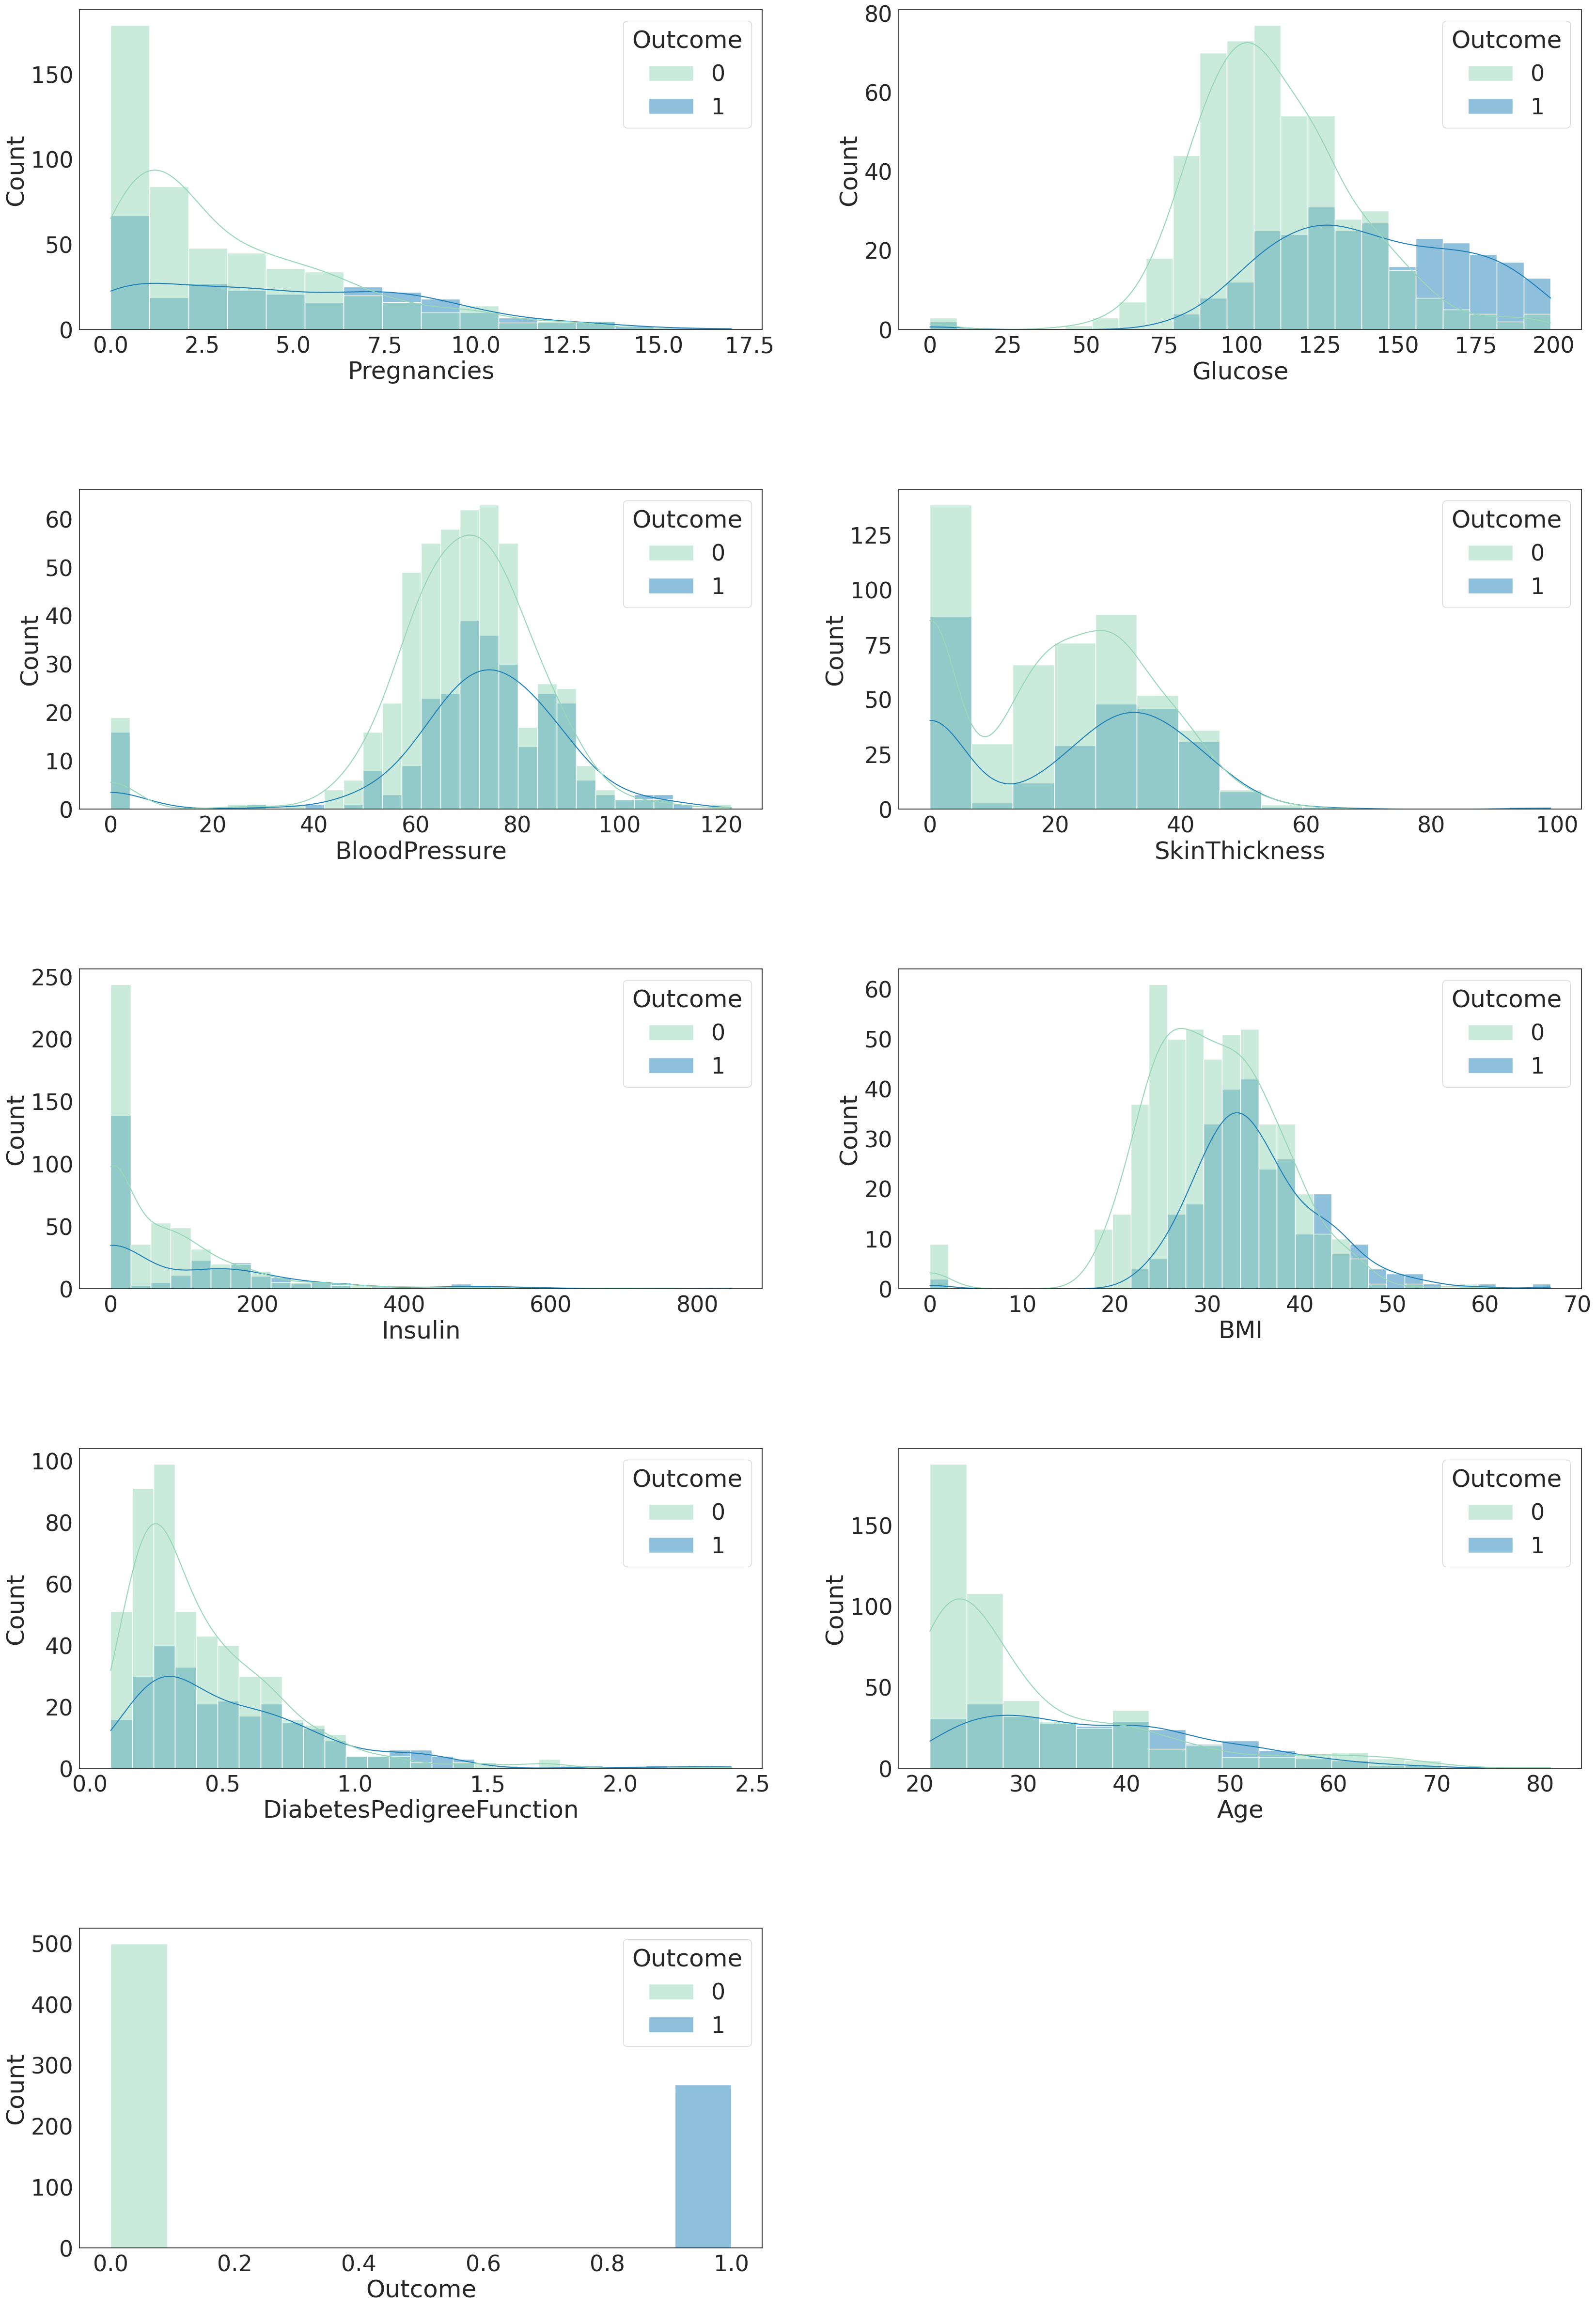

In [77]:
plt.figure(figsize=(40, 60))
sns.set(font_scale=3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1
for col in columns:
    plt.subplot(5, 2, i)
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, palette="YlGnBu")
    i = i + 1

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning:

Ignoring `palette` because no `hue` variable has b

<Figure size 1000x800 with 0 Axes>

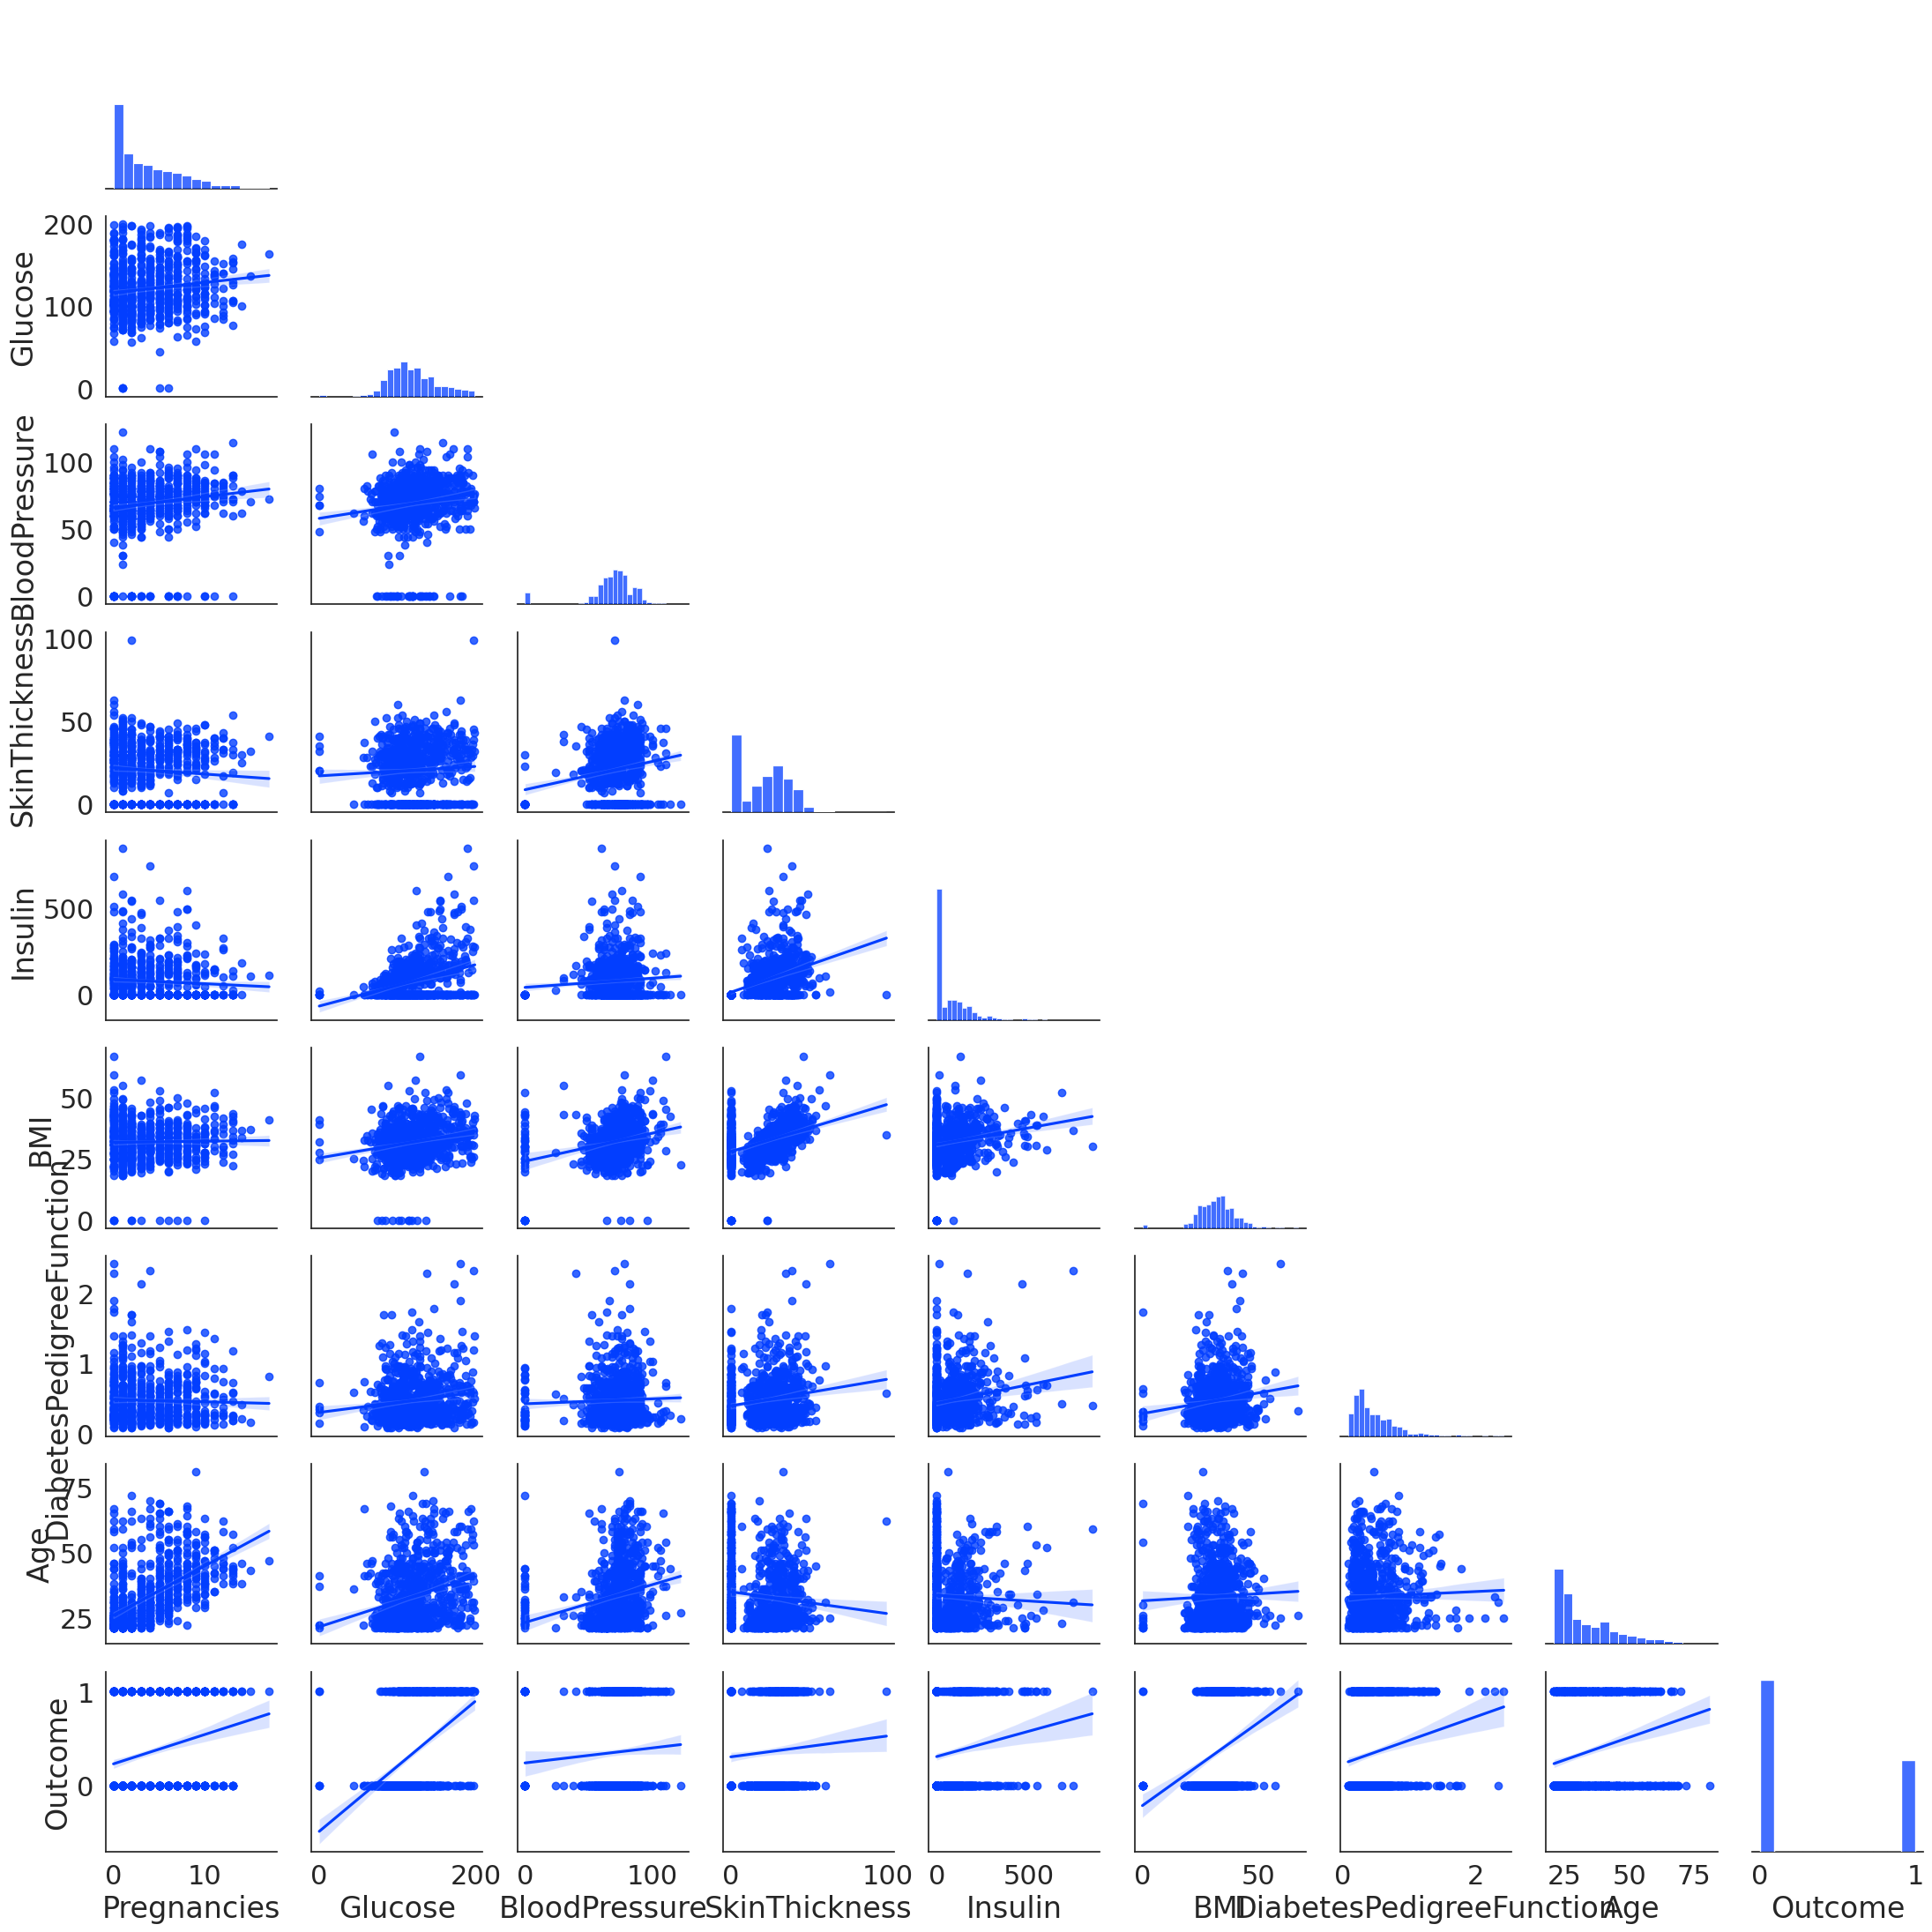

In [78]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(df,kind = 'reg',corner = True,palette ='YlGnBu' )

Observation:

The correlation between Outcome and Glucose is high. Glucoe seems to be the most important feature in model training.
BMI, Pregnancys, and Age are also expected to be used as important features in model training.
High correlation coefficient with SkinThickness and BMI. There may be a multicollinearity problem, but if there is a performance problem after checking the result, check it again.

In [14]:
# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values



## Standardise each column
$$z= \frac{x - \mu}{\sigma} $$




In [15]:

# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [16]:

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The data (X and y) is converted into PyTorch tensors.
The tensors are then moved to the appropriate device (CPU or GPU).
The model is also moved to the same device to ensure all operations are performed on the same hardware, optimizing performance and compatibility.

In [17]:
# Convert the data into PyTorch tensors and move to the appropriate device (CPU/GPU)
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)


In [52]:

# Step 3: Build the ANN Model
class ANN_Model(nn.Module):
    def __init__(self):
        super(ANN_Model, self).__init__()
        # Define the layers of the neural network
        self.f_connected1 = nn.Linear(8, 20)  # First fully connected layer (input: 8 features, output: 20 neurons)
        self.f_connected2 = nn.Linear(20, 20) # Second fully connected layer (input: 20 neurons, output: 20 neurons)
        self.out = nn.Linear(20, 2)           # Output layer (input: 20 neurons, output: 2 classes)

    def forward(self, x):
        # Define the forward pass through the network
        x = torch.relu(self.f_connected1(x)) # Apply ReLU activation to the first layer's output
        x = torch.relu(self.f_connected2(x)) # Apply ReLU activation to the second layer's output
        x = self.out(x)                      # Pass through the output layer (no activation here)
        return x

# Instantiate the model and move to the appropriate device (CPU/GPU)
model = ANN_Model().to(device)

**Adam** is a specific optimization algorithm known as Adaptive Moment Estimation. It combines the benefits of two other popular methods: AdaGrad and RMSProp. Adam is widely used because it adapts the learning rate for each parameter and includes momentum, making it suitable for a wide range of problems and often leading to faster convergence.

Prepares the optimizer for use in the training loop to iteratively adjust the model's weights and biases to minimize the loss function and improve model performance.

In [53]:

# Step 4: Train the Model
# Define the loss function (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()
# Define the optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.05) #learning rate

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()           # Clear the gradients
    outputs = model(X_train)        # Forward pass: compute the model output
    loss = criterion(outputs, y_train) # Compute the loss
    loss.backward()                 # Backward pass: compute the gradients
    optimizer.step()                # Update the model parameters
    if (epoch+1) % 10 == 0:         # Print loss every 10 epochs
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 0.4412
Epoch [20/100], Loss: 0.3954
Epoch [30/100], Loss: 0.3454
Epoch [40/100], Loss: 0.2888
Epoch [50/100], Loss: 0.2365
Epoch [60/100], Loss: 0.1805
Epoch [70/100], Loss: 0.1313
Epoch [80/100], Loss: 0.1182
Epoch [90/100], Loss: 0.1139
Epoch [100/100], Loss: 0.0811


In [54]:
# Step 5: Evaluate the Model
model.eval()                        # Set the model to evaluation mode
with torch.no_grad():               # Disable gradient computation for inference
    predictions = model(X_test).argmax(dim=1)  # Get the class with the highest probability
    accuracy = (predictions == y_test).float().mean()  # Calculate the accuracy
    print(f'Accuracy: {accuracy:.4f}')



Accuracy: 0.7143


In [55]:
# Step 6: Save and Load the Model
torch.save(model, 'diabetes_model.pth')  # Save the trained model to a file
model = torch.load('diabetes_model.pth') # Load the model from the file
model.eval()                             # Set the model to evaluation mode



ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [58]:
# Step 7: Make Predictions
# Define a new data point for prediction
"""
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
"""
new_data = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
new_data = torch.tensor(new_data, dtype=torch.float32).to(device) # Convert to tensor and move to the appropriate device


In [59]:

# Predict the class for the new data point
with torch.no_grad():                       # Disable gradient computation for inference
    prediction = model(new_data).argmax().item() # Get the class with the highest probability
    print(f'Prediction for new data point: {prediction}')

Prediction for new data point: 1
